<a href="https://colab.research.google.com/github/escape13/deepfried/blob/master/IntroTorch/BuildingNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing the dataset

In [1]:
# import packages

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [3]:
# get handwritten digit MNIST dataset

from torchvision import datasets, transforms

# converse and normalize dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# download dataset
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
# extract images and labels

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


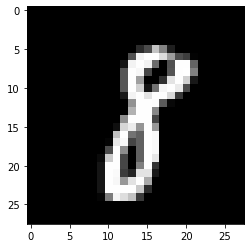

In [5]:
# show sample image

plt.imshow(images[4].numpy().squeeze(), cmap='gray')

## Getting output and creating a neural network

In [6]:
def sigmoid(x):
    return 1/(1 + torch.exp(-x))

In [7]:
features = images.view(images.shape[0], -1)

n_input = 784
n_hidden = 256
n_output = 10

w1 = torch.randn((n_input, n_hidden))
w2 = torch.randn((n_hidden, n_output))
b1 = torch.randn((1, n_hidden))
b2 = torch.randn((1, n_output))

h = sigmoid(torch.mm(features, w1) + b1)
out = torch.mm(h, w2) + b2
out.shape

torch.Size([64, 10])

In [8]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilites = softmax(out)

<BarContainer object of 10 artists>

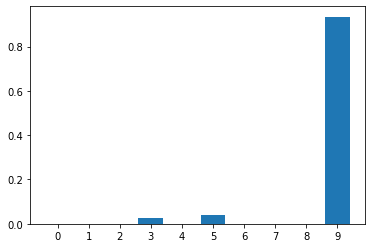

In [9]:
plt.xticks(range(10))
plt.bar(range(10), probabilites[4])

It can be seen that, obviously, untrained network doesn't classify correctly.

## Creating a network with PyTorch

In [11]:
from torch import nn
import torch.nn.functional as F

In [20]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)

        return x

In [21]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

## Creating a two-layer network to recognize handwritten digits

In [24]:
class Network2(nn.Module):
    def __init__(self):
        super().__init__()

        self.h1 = nn.Linear(784, 128)
        self.h2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.h1(x))
        x = F.relu(self.h2(x))
        x = F.softmax(self.output(x))
        
        return x

model = Network2()
model

Network2(
  (h1): Linear(in_features=784, out_features=128, bias=True)
  (h2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)